# <u>Assignment 7</u>:
# WEEK 7: Deploying Machine Learning Models with Streamlit
   Develop a web application using Streamlit to deploy a trained machine learning model. The app should allow users to input data, receive predictions, and understand model outputs through visualizations. This task will help you learn how to make your models accessible and interactive.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart_cleveland_upload.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [6]:
df.shape

(297, 14)

<Axes: xlabel='condition', ylabel='count'>

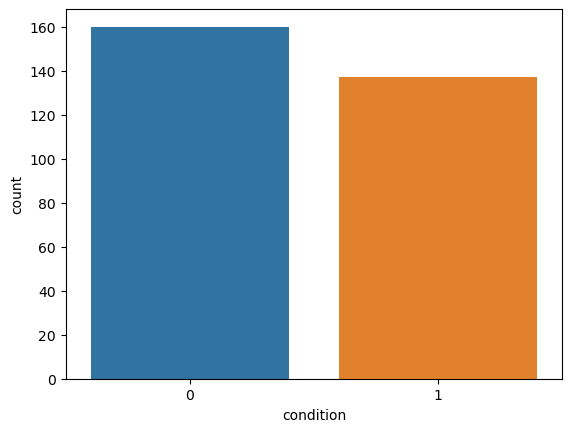

In [32]:
sns.countplot(x='condition', data=df)

<Axes: xlabel='age', ylabel='Count'>

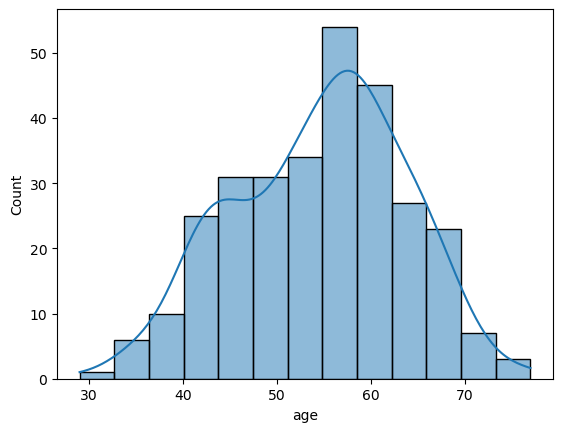

In [36]:
sns.histplot(df['age'], kde=True)

<Axes: xlabel='sex', ylabel='count'>

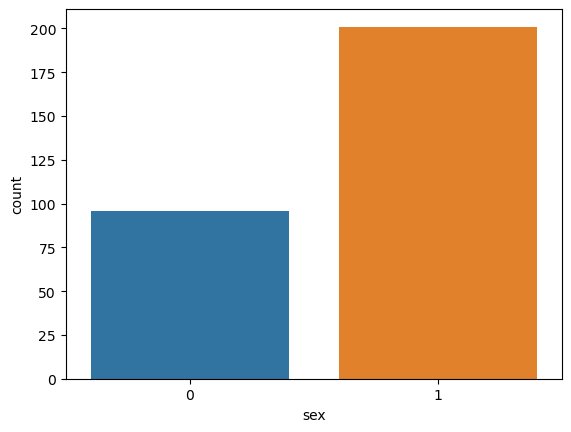

In [37]:
sns.countplot(x='sex', data=df)

<Axes: xlabel='cp', ylabel='count'>

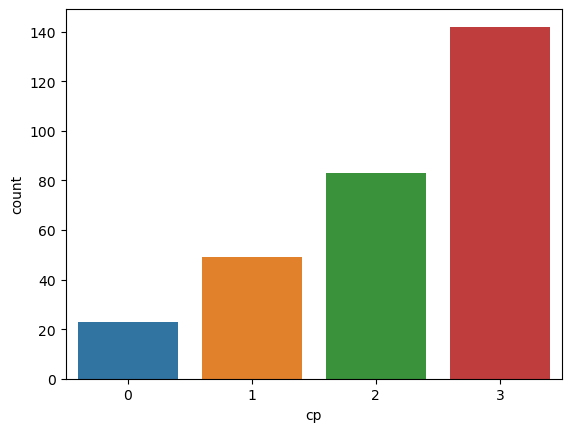

In [38]:
sns.countplot(x='cp', data=df)

<Axes: xlabel='trestbps', ylabel='Count'>

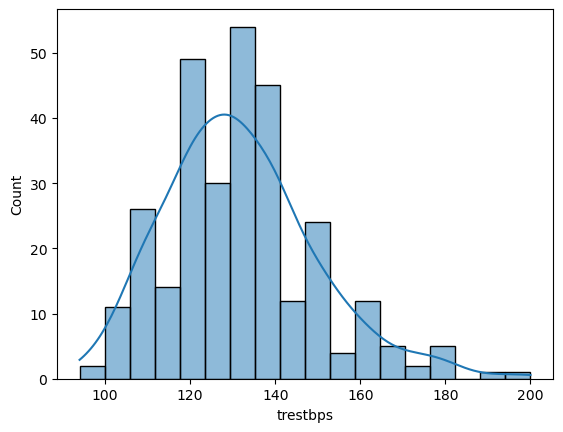

In [39]:
sns.histplot(df['trestbps'], kde=True)

<Axes: xlabel='chol', ylabel='Count'>

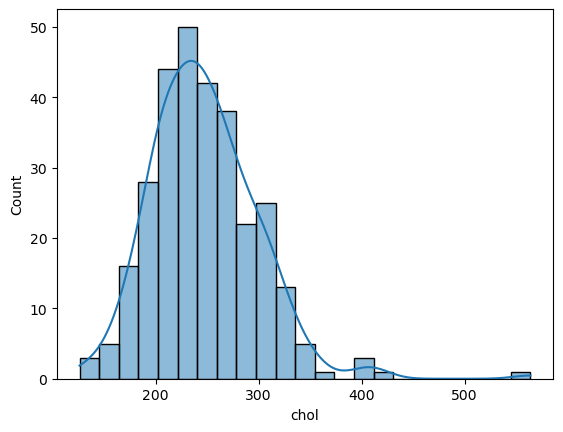

In [40]:
sns.histplot(df['chol'], kde=True)

<Axes: xlabel='fbs', ylabel='count'>

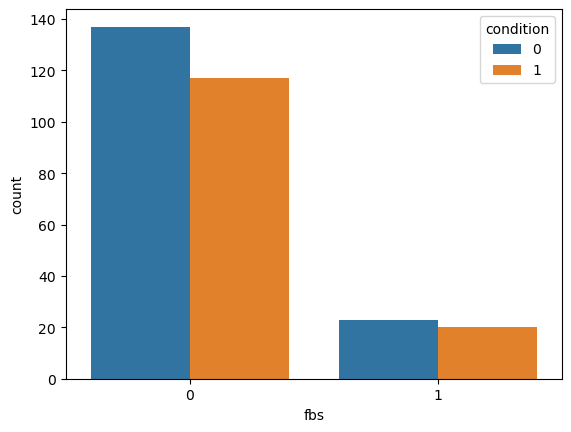

In [44]:
sns.countplot(data=df, x='fbs',hue='condition')

<Axes: >

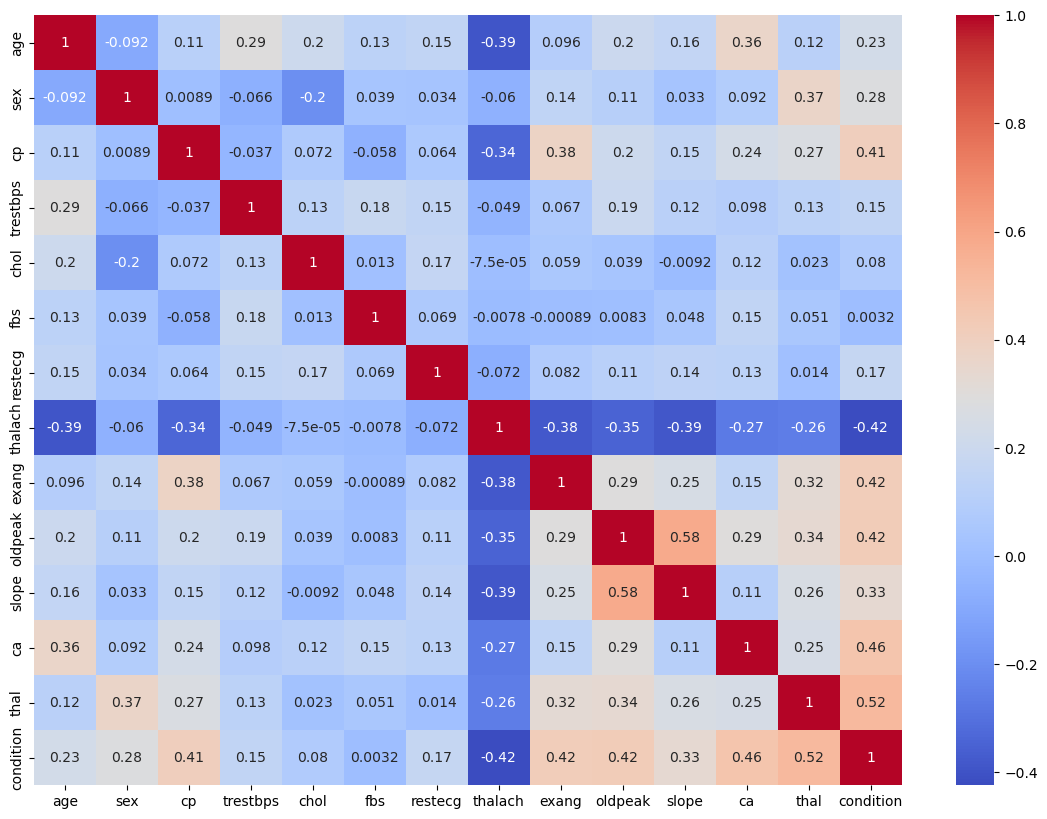

In [34]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='slope', ylabel='count'>

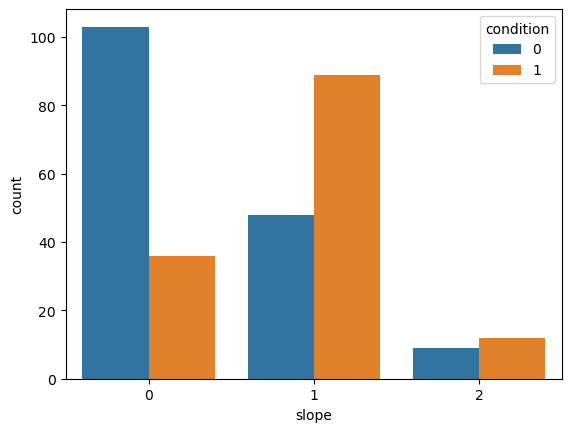

In [46]:
sns.countplot(data=df, x='slope',hue='condition')

<Axes: xlabel='ca', ylabel='count'>

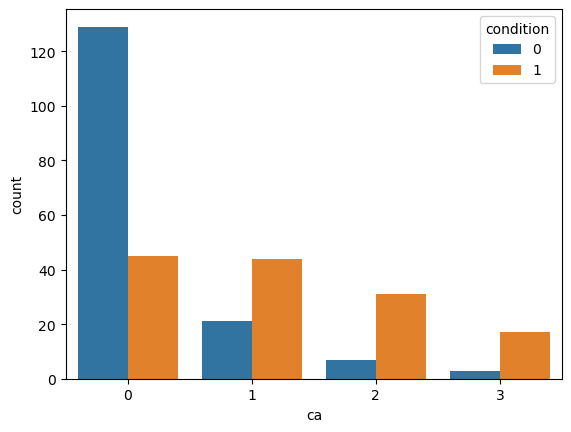

In [48]:
sns.countplot(data=df, x='ca',hue='condition')

<Axes: xlabel='thal', ylabel='count'>

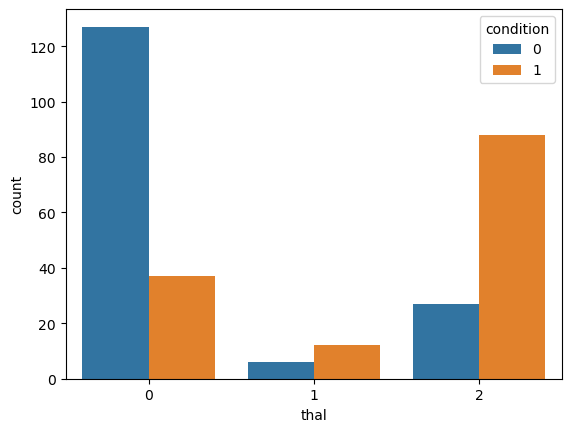

In [49]:
sns.countplot(data=df, x='thal',hue='condition')

<Axes: xlabel='oldpeak', ylabel='Count'>

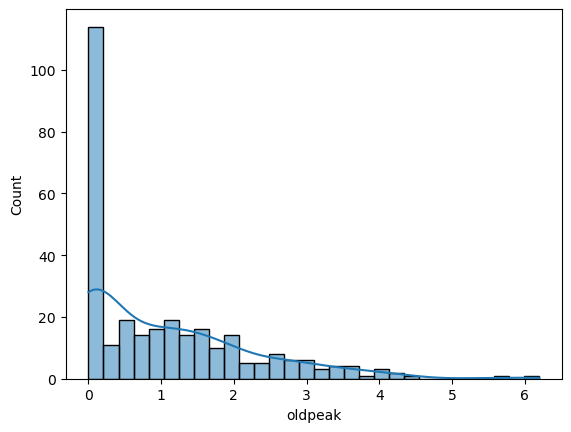

In [53]:
sns.histplot(df['oldpeak'], bins=30, kde=True)

In [35]:
correlations = df.corr(numeric_only=True)['condition'].drop('condition').sort_values(ascending=False)
correlations

thal        0.520516
ca          0.463189
oldpeak     0.424052
exang       0.421355
cp          0.408945
slope       0.333049
sex         0.278467
age         0.227075
restecg     0.166343
trestbps    0.153490
chol        0.080285
fbs         0.003167
thalach    -0.423817
Name: condition, dtype: float64

### Based on observation higly corelated features are:
- thal        :0.520516
- ca          :0.463189
- oldpeak     :0.424052
- exang       :0.421355
- cp          :0.408945
- slope       :0.333049
- sex         :0.278467
- age         :0.227075

Initially will go with these and then plot feature importance, 

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

In [55]:
X = df.drop(['restecg','trestbps','chol','fbs','thalach','condition'], axis=1)
y = df['condition']

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [60]:
cont_cols=['age','oldpeak']
scaler=StandardScaler()

In [61]:
X_train_scaled=X_train.copy()
X_test_scaled=X_test.copy()
X_train_scaled[cont_cols]=scaler.fit_transform(X_train[cont_cols])
X_test_scaled[cont_cols]=scaler.fit_transform(X_test[cont_cols])

# Model Selection:
## Logistic Regression

In [63]:
#Logistic Regression:
logreg=LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled,y_train)
y_pred_log=logreg.predict(X_test_scaled)
y_prob_log = logreg.predict_proba(X_test_scaled)[:, 1]

In [65]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        32
           1       1.00      0.79      0.88        28

    accuracy                           0.90        60
   macro avg       0.92      0.89      0.90        60
weighted avg       0.92      0.90      0.90        60



In [67]:
roc_auc_score(y_test, y_prob_log)

0.9408482142857143

## Random Forest

In [68]:
rf = RandomForestClassifier(n_estimators=200, max_depth=5, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)  # No scaling needed
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

In [69]:
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        32
           1       0.95      0.75      0.84        28

    accuracy                           0.87        60
   macro avg       0.89      0.86      0.86        60
weighted avg       0.88      0.87      0.86        60

ROC AUC: 0.9620535714285714


## XGBoost

In [70]:
xg = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xg.fit(X_train, y_train)
y_pred_xg = xg.predict(X_test)
y_prob_xg = xg.predict_proba(X_test)[:, 1]

C:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:10:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [71]:
print(classification_report(y_test, y_pred_xg))
print("ROC AUC:", roc_auc_score(y_test, y_prob_xg))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        32
           1       0.76      0.79      0.77        28

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60

ROC AUC: 0.9308035714285714


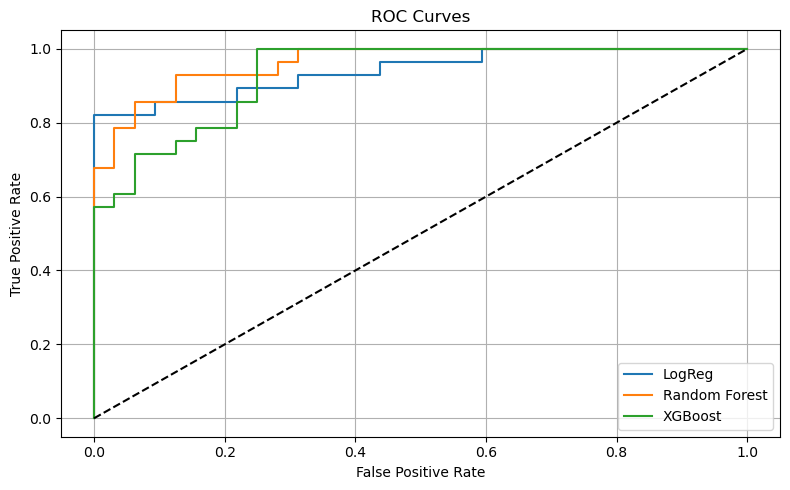

In [74]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xg, tpr_xg, _ = roc_curve(y_test, y_prob_xg)

plt.figure(figsize=(8, 5))
plt.plot(fpr_log, tpr_log, label="LogReg")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot(fpr_xg, tpr_xg, label="XGBoost")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [75]:
import joblib

In [76]:
selected_features = ['age', 'sex', 'cp', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

joblib.dump(selected_features, "features.pkl")
joblib.dump(rf, "heart_model.pkl")

['heart_model.pkl']